In [70]:
import numpy as np
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
def step_function(sum):
    if sum >= 0:
        return 1
    elif sum < 0:
        return 0

In [72]:
class Perceptron:
    def __init__(self, input_dimension, epochs = 10, learning_rate = 0.01, train_set_size = 0):
        self.train_set_size = train_set_size
        self.weights = np.random.rand(input_dimension + 1)
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.error = [0]*epochs
        self.dim = input_dimension

    def predict(self, input):
        input_with_bias = np.insert(input,0,1)
        weighted_sum = np.dot(self.weights, input_with_bias)
        activation = step_function(weighted_sum)
        return activation

    def train(self, training_set, true_labels):
        
       
        for i in range(self.epochs):
            error = 0
            
            for input, label in zip(training_set, true_labels):
                predictor = self.predict(input)
                input_with_bias = np.insert(input,0,1) #adding element 1 to the input vector at the beginning
                
                error += (label-predictor)**2
                
                print('for Epoch',i, 'error =', error/self.train_set_size)
                self.weights += (label - predictor)*self.learning_rate*input_with_bias
         
            error /= self.train_set_size
            self.error[i] = error/2
    
        return self.weights

In [73]:
def ConfusionMatrix(predicted_labels, test_labels):
    mat = np.array([[0,0],[0,0]])
    for i,j in zip(test_labels,predicted_labels):
        if i == j:
                mat[i][i] += 1
        elif i != j:
                mat[i][j] += 1
    sns.heatmap(mat, annot=True,fmt='', cmap='Reds')
    plt.title("Confusion Matrix", fontsize=20)
    plt.xlabel("Predicted", fontsize=15)
    plt.ylabel("Actual", fontsize=15)
    plt.show()
    return mat

In [74]:
from sklearn.datasets import load_iris
iris = load_iris()

In [75]:
print('The data matrix:\n',iris['data'])

The data matrix:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5

In [76]:
print('The classification target:\n',iris['target'])

The classification target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [77]:
print('The names of the dataset columns:\n',iris['feature_names'])

The names of the dataset columns:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [78]:
print('The names of target classes:\n',iris['target_names'])

The names of target classes:
 ['setosa' 'versicolor' 'virginica']


Text(0.5, 1.0, 'Iris dataset visualized in 2 features')

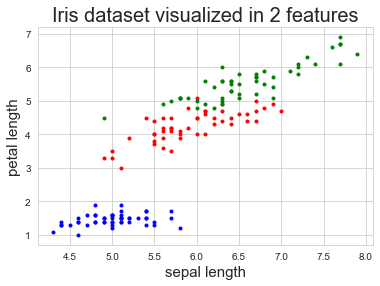

In [79]:
x, y = iris.data, iris.target

plt.ion()
fig, ax = plt.subplots()

temp_data = x[0 == y]
ax.scatter(temp_data[:,0], temp_data[:,2], color = 'blue', marker='.')

temp_data = x[1 == y]
ax.scatter(temp_data[:,0], temp_data[:,2], color = 'red', marker='.')

temp_data = x[2 == y]
ax.scatter(temp_data[:,0], temp_data[:,2], color = 'green', marker='.')

ax.set_xlabel("sepal length", fontsize=15)
ax.set_ylabel("petal length", fontsize=15)
ax.set_title('Iris dataset visualized in 2 features', fontsize=20)

#ax.scatter(x[:,0], x[:,2], marker='.', c=y)

In [80]:
X=[]
Y=[]
index=[]
for i in range(len(y)):
    if y[i] != 2:
        Y.append(y[i])
        X.append(x[i])
        
X=np.array(X)
Y=np.array(Y)

Text(0.5, 1.0, 'Iris dataset visualized in 2 features')

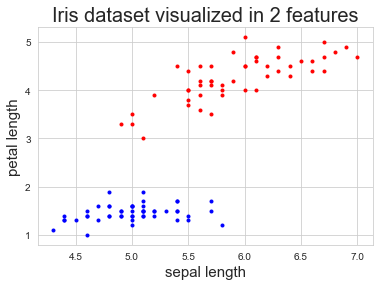

In [81]:
plt.ion()
fig, ax = plt.subplots()

temp_data = X[0 == Y]
ax.scatter(temp_data[:,0], temp_data[:,2], color = 'blue', marker='.')

temp_data = X[1 == Y]
ax.scatter(temp_data[:,0], temp_data[:,2], color = 'red', marker='.')

ax.set_xlabel("sepal length", fontsize=15)
ax.set_ylabel("petal length", fontsize=15)
ax.set_title('Iris dataset visualized in 2 features', fontsize=20)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [83]:
model = Perceptron(4,2, train_set_size=len(X_train))

wt = model.train(X_train, y_train)

for Epoch 0 error = 0.0125
for Epoch 0 error = 0.0125
for Epoch 0 error = 0.0125
for Epoch 0 error = 0.0125
for Epoch 0 error = 0.025
for Epoch 0 error = 0.0375
for Epoch 0 error = 0.0375
for Epoch 0 error = 0.05
for Epoch 0 error = 0.0625
for Epoch 0 error = 0.075
for Epoch 0 error = 0.075
for Epoch 0 error = 0.075
for Epoch 0 error = 0.075
for Epoch 0 error = 0.075
for Epoch 0 error = 0.075
for Epoch 0 error = 0.0875
for Epoch 0 error = 0.1
for Epoch 0 error = 0.1
for Epoch 0 error = 0.1125
for Epoch 0 error = 0.125
for Epoch 0 error = 0.125
for Epoch 0 error = 0.125
for Epoch 0 error = 0.125
for Epoch 0 error = 0.1375
for Epoch 0 error = 0.1375
for Epoch 0 error = 0.15
for Epoch 0 error = 0.1625
for Epoch 0 error = 0.1625
for Epoch 0 error = 0.175
for Epoch 0 error = 0.175
for Epoch 0 error = 0.1875
for Epoch 0 error = 0.1875
for Epoch 0 error = 0.2
for Epoch 0 error = 0.2125
for Epoch 0 error = 0.2125
for Epoch 0 error = 0.225
for Epoch 0 error = 0.2375
for Epoch 0 error = 0.2375
f

In [84]:
predicted = []
for i in range(len(y_test)):
    predicted.append(model.predict(X_test[i]))

In [85]:
print(predicted)
print(y_test)

[1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0]
[1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0]


In [86]:
correct_classification = 0
for i,j in zip(y_test,predicted):
    if i == j:
        correct_classification+=1

accuracy = correct_classification/len(predicted)
print('Accuracy: ',accuracy)

Accuracy:  1.0


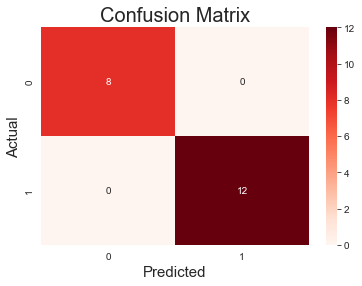

Precision:  1.0
Recall:  1.0
Specificity:  1.0
f1_score= 1.0


In [87]:
cf_mat = ConfusionMatrix(predicted, y_test)

precision = cf_mat[0,0] / (cf_mat[0,0] + cf_mat[1,0])
print('Precision: ',precision)

recall = cf_mat[0,0] / (cf_mat[0,0] + cf_mat[0,1])
print('Recall: ',recall)

specificity= cf_mat[1,1] / (cf_mat[1,0] + cf_mat[1,1])
print('Specificity: ',specificity)

f1_score = (2 * precision * recall) / (precision + recall)
print('f1_score=',f1_score)

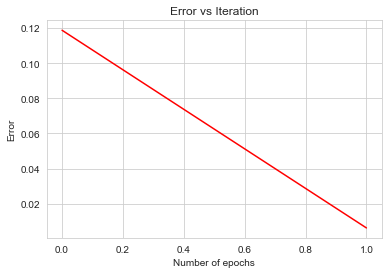

In [88]:
train_error = model.error

plt.title("Error vs Iteration")
plt.plot(train_error, color = 'r')
plt.xlabel("Number of epochs")
plt.ylabel("Error")
plt.show(block = True)
